In [70]:
# Loading the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Loading the dataset
data = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

In [5]:
# Glimpse of the dataset
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [4]:
# Checking for any missing values
data.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [6]:
#Information about the variables and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.5+ KB


Univariate Analysis of Categorical Features

In [8]:
data['Year'].nunique()

19

In [7]:
data['Year'].value_counts()

2015    572
2003    572
2008    572
2016    572
2001    572
2009    572
2017    572
2002    572
2010    572
2011    572
2007    572
2004    572
2012    572
2005    572
2013    572
2006    572
2014    572
1999    572
2000    572
Name: Year, dtype: int64

The dataset contains information for 19 years from 1999 to 2017 and each year has 572 data points

In [9]:
data['113 Cause Name'].nunique()

11

In [10]:
data['113 Cause Name'].value_counts()

Cerebrovascular diseases (I60-I69)                                       988
Alzheimer's disease (G30)                                                988
Diabetes mellitus (E10-E14)                                              988
Influenza and pneumonia (J09-J18)                                        988
Diseases of heart (I00-I09,I11,I13,I20-I51)                              988
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     988
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    988
Malignant neoplasms (C00-C97)                                            988
Chronic lower respiratory diseases (J40-J47)                             988
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     988
All Causes                                                               988
Name: 113 Cause Name, dtype: int64

The dataset contains 11 Cause names and each cause name has 988 data points

In [11]:
data['Cause Name'].nunique()

11

In [12]:
data['Cause Name'].value_counts()

Influenza and pneumonia    988
Alzheimer's disease        988
Suicide                    988
CLRD                       988
Kidney disease             988
All causes                 988
Stroke                     988
Unintentional injuries     988
Heart disease              988
Cancer                     988
Diabetes                   988
Name: Cause Name, dtype: int64

We can see that the column "113 Cause Name" and "Cause Name" are nearly the same

In [13]:
data['State'].nunique()

52

In [14]:
data['State'].value_counts()

Montana                 209
Idaho                   209
New York                209
Pennsylvania            209
South Carolina          209
Washington              209
Louisiana               209
Alabama                 209
Kentucky                209
Wyoming                 209
Connecticut             209
Ohio                    209
Maine                   209
Utah                    209
West Virginia           209
Massachusetts           209
New Jersey              209
Kansas                  209
Colorado                209
Mississippi             209
North Carolina          209
District of Columbia    209
Michigan                209
Oregon                  209
Nevada                  209
Indiana                 209
Vermont                 209
Maryland                209
Florida                 209
United States           209
Georgia                 209
Alaska                  209
New Hampshire           209
Illinois                209
New Mexico              209
Oklahoma            

The dataset contains information of a total of 52 states ad each state has 209 datapoints

Univariate analysis of Numerical features

In [18]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


Bi-Variate Analysis

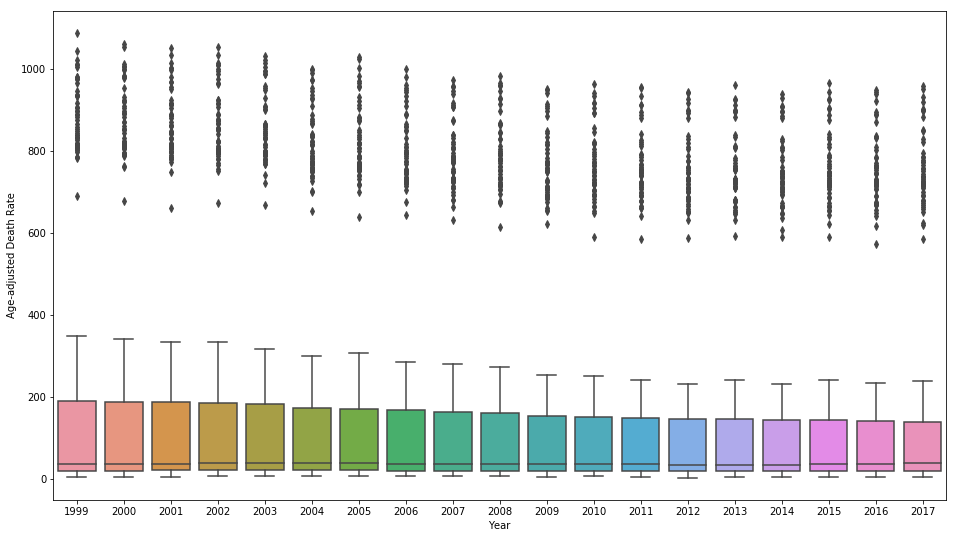

In [26]:
# Analyzing the 'year' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(16, 9))
sns.boxplot(data['Year'], data['Age-adjusted Death Rate'])

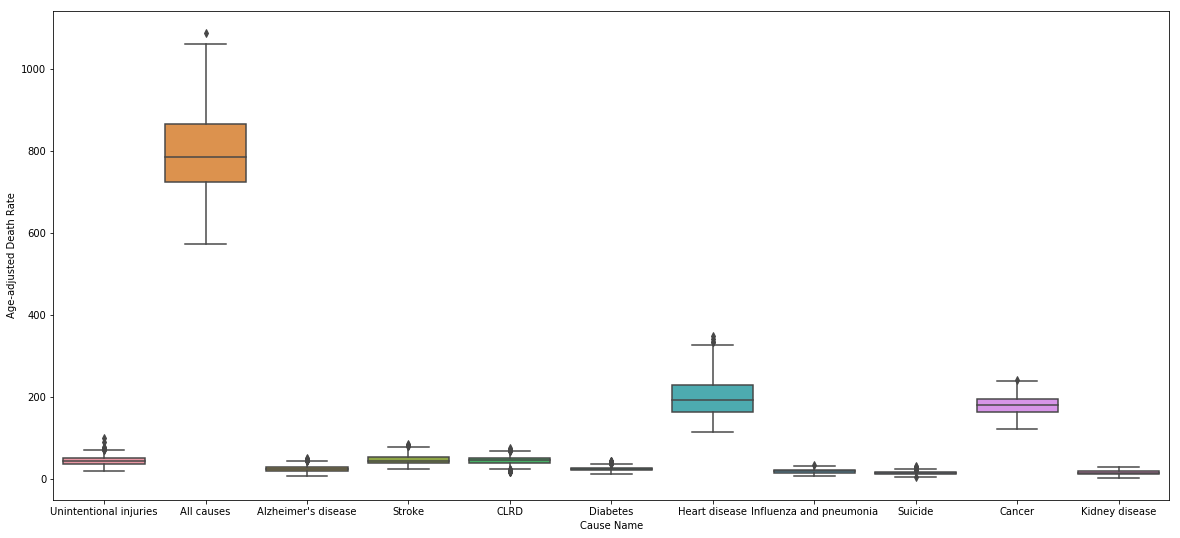

In [25]:
# Analyzing the 'Cause Name' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(20, 9))
sns.boxplot(data['Cause Name'], data['Age-adjusted Death Rate'])

We can see that Heart Disease has the highest Age-adjusted Death Rate followed by Cancer

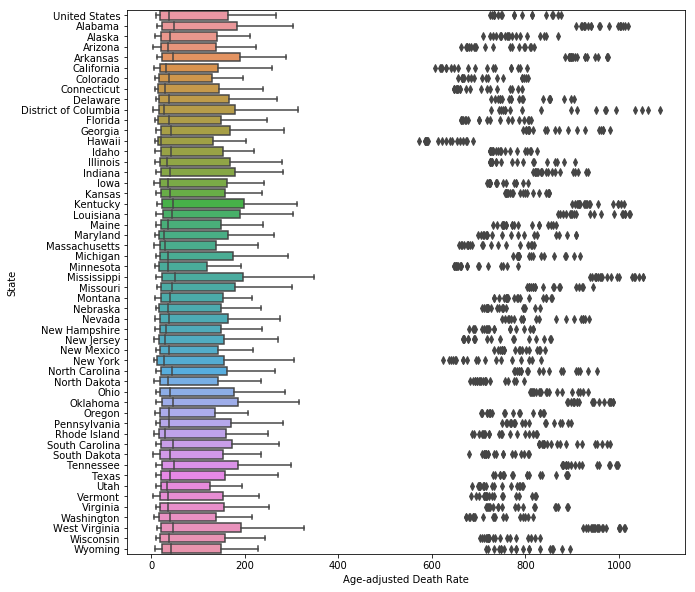

In [32]:
# Analyzing the 'State' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(10, 10))
sns.boxplot(data['Age-adjusted Death Rate'],data['State'])

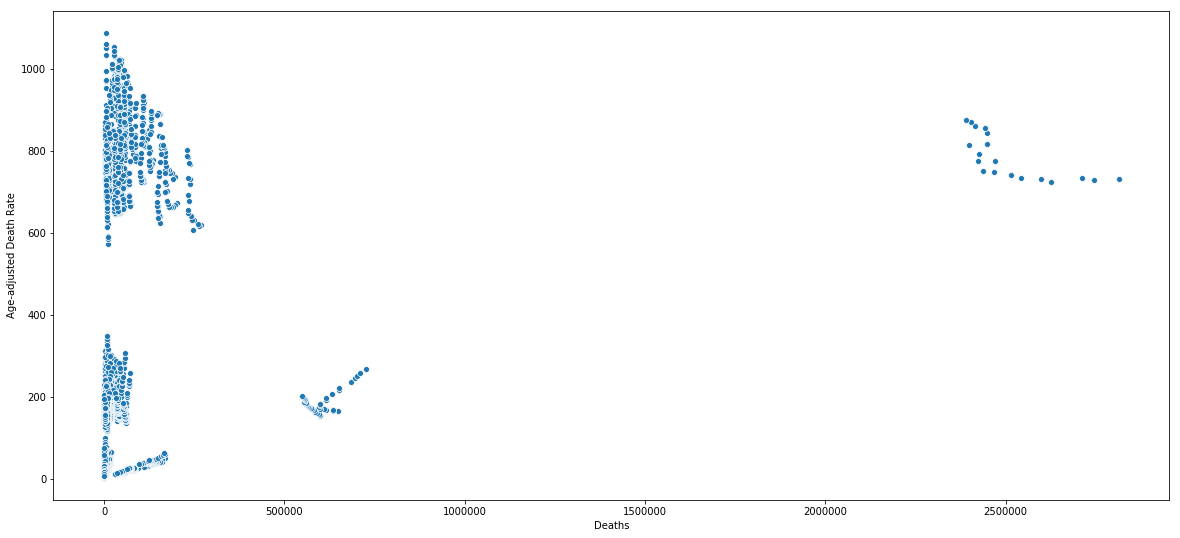

In [34]:
# Analyzing the 'Deaths' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(20, 9))
sns.scatterplot(data['Deaths'], data['Age-adjusted Death Rate'])

In [90]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per year
df = data.groupby('Year').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
Year,,
1999,15025.262238,143.517657
2000,15054.353147,142.217133
2001,15090.150350,140.362762
2002,15252.657343,139.978497
2003,15246.164336,138.022203
2004,14901.216783,132.391958
2005,15167.825175,132.766434
2006,14968.321678,128.669231
2007,14930.115385,126.036713


In [102]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per Cause Name
df = data.groupby('Cause Name').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
Cause Name,,
All causes,96616.536437,798.633907
Alzheimer's disease,3025.943320,25.010223
CLRD,5252.888664,44.596862
Cancer,21950.696356,178.586134
Diabetes,2833.892713,23.393522
Heart disease,24742.186235,198.002935
Influenza and pneumonia,2215.872470,18.204757
Kidney disease,1738.082996,14.068927
Stroke,5519.277328,45.888563


In [89]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per State
df = data.groupby('State').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
State,,
Alabama,7672.416268,153.289474
Alaska,564.066986,122.824402
Arizona,7523.650718,117.020096
Arkansas,4724.665072,148.490909
California,39088.578947,112.487081
Colorado,4973.373206,113.485646
Connecticut,4693.909091,110.500957
Delaware,1220.167464,127.641148
District of Columbia,808.167464,137.261244


Machine Learning Modelling

In [42]:
# Converting categorical values to labels using Label Encoder

le = LabelEncoder()
data['Year'] = le.fit_transform(data['Year'])
data['Cause Name'] = le.fit_transform(data['Cause Name'])
data['State'] = le.fit_transform(data['State'])

In [44]:
# Dropping '113 Cause Name' because we already have 'Cause Name'
data.drop('113 Cause Name', axis = 1, inplace=True)

In [46]:
data.columns

Index(['Year', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate'], dtype='object')

In [47]:
# Creating target variable y and Independent variables X

X = data.drop('Age-adjusted Death Rate', axis=1)
y = data['Age-adjusted Death Rate']

In [48]:
# train test splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Model - 1 : Linear Regression

In [53]:
# Fitting the Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Making predictions on the test set

preds_lr = lr.predict(X_test)

In [61]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Logistic Regression is : ", np.sqrt(mean_squared_error(y_test, preds_lr)))

Root mean squared error score of Logistic Regression is :  188.64327346201975


Model - 2 : Random Forest Regression

In [63]:
# Fitting the Random Forest Regression Model

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
# Making predictions on the test set

preds_rf = rf.predict(X_test)

In [65]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Random Forest Regression is : ", np.sqrt(mean_squared_error(y_test, preds_rf)))

Root mean squared error score of Random Forest Regression is :  11.47372791372017


Model - 3 : Xgboost Regression

In [71]:
# Fitting the Xgboost Regression Model

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)

[11:13:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [72]:
# Making predictions on the test set

preds_xgb = xg.predict(X_test)

In [73]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Xgboost Regression is : ", np.sqrt(mean_squared_error(y_test, preds_xgb)))

Root mean squared error score of Xgboost Regression is :  24.923996706177086
